In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df = pd.read_excel(r'..\Data\India_Exchange_Rate_Dataset.xls',
index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt 
detrended = signal.detrend(df.EXINUS.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['trend'] = EXINUS_trend
detrended = df.EXINUS - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

In [ ]:
df.head()

In [ ]:
from pandas.plotting import autocorrelation_plot
# plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(df.EXINUS.tolist())

In [ ]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['EXINUS'], model='multiplicative', extrapolate_trend='freq', )
deseason = df['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(10,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

In [ ]:
print(dir(result_mul))

result_mul.observed

In [ ]:
# Cyclical variations

df['cycle'] =EXINUS_cycle
df['trend'] =EXINUS_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

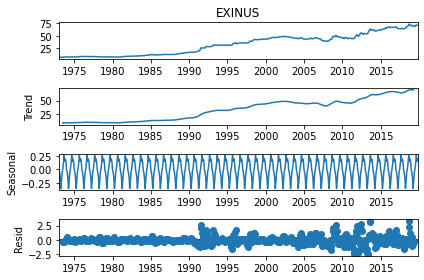

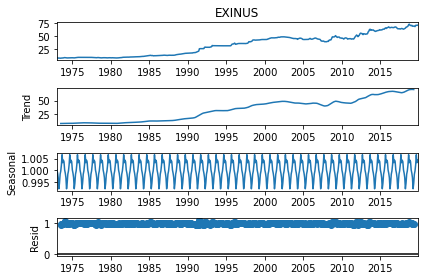

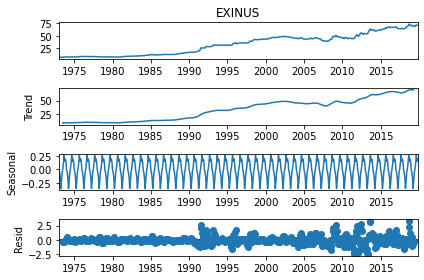

In [24]:
# seasonal_decompose in parts
result = seasonal_decompose(df['EXINUS'], model='mul') 
result.plot()

result = seasonal_decompose(df['EXINUS'], model='add') 
result.plot()

In [25]:
print(dir(result))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_observed', '_resid', '_seasonal', '_trend', '_weights', 'nobs', 'observed', 'plot', 'resid', 'seasonal', 'trend', 'weights']
